## Importing Libraries

## Part 1 a. Explore the dataset

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
import warnings
warnings.filterwarnings('ignore')


In [108]:
# Load the dataset
df = pd.read_csv('data_science_challenge_data (3) (1).csv')

In [109]:
pd.set_option('display.float_format', '{:.2f}'.format)


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67107 entries, 0 to 67106
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   neighbourhood  67107 non-null  object 
 1   price          67107 non-null  float64
 2   size           67107 non-null  float64
 3   bedrooms       67107 non-null  int64  
 4   bathrooms      63657 non-null  float64
 5   building       61068 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 3.1+ MB


In [82]:
print("\n--- Descriptive Statistics ---")
print(df.describe())


--- Descriptive Statistics ---
             price       size  bedrooms  bathrooms
count     67107.00   67107.00  67107.00   63657.00
mean     219911.78    1621.59      1.65       2.40
std     5882341.62    9049.48      1.01       1.08
min       22000.00    -755.00      0.00       1.00
25%       99000.00     840.00      1.00       2.00
50%      130000.00    1200.00      2.00       2.00
75%      165000.00    1637.00      2.00       3.00
max   565352964.00 1170000.00     12.00      12.00


Note - there is a negative value in the size column . Need to check for this column.

In [83]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
neighbourhood       0
price               0
size                0
bedrooms            0
bathrooms        3450
building         6039
dtype: int64


In [84]:
df.isna().sum()

,0
neighbourhood,0
price,0
size,0
bedrooms,0
bathrooms,3450
building,6039


In [85]:
(df.isnull().sum() / len(df)) * 100  # % missing

,0
neighbourhood,0.00
price,0.00
size,0.00
bedrooms,0.00
bathrooms,5.14
building,9.00


9% of missing value is in building and almost 5 % of the data is missing in bathrooms

### Visualizing the Missing Data

<Axes: >

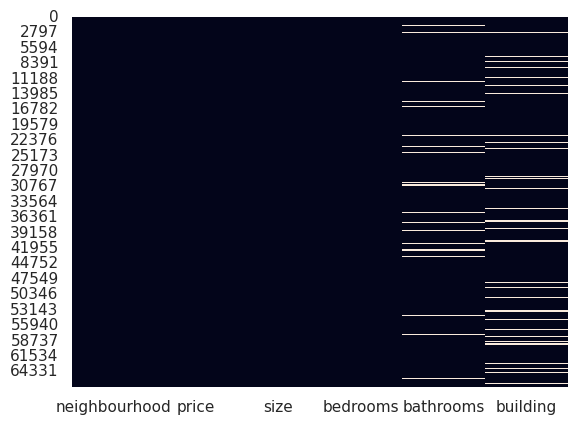

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)

Key Observations:

Most features (neighbourhood, price, size, bedrooms) have no missing values — fully dark (complete) columns.

bathrooms and building columns show white horizontal lines, which indicate missing values in those specific rows.

The missing values are scattered — they do not appear in continuous blocks or exclusively in a pattern tied to row indices (e.g., all at the top or bottom).
→ This suggests Missing At Random (MAR) rather than MCAR or MNAR.

###  Data Cleaning

In [87]:

# This method of imputation is used since there is a high correlation between bedroooms and bathrooms whihch we will find out later

imputation_map = df.groupby('bedrooms')['bathrooms'].transform(lambda x: np.round(x.mean()))
imputation_map

,bathrooms
0,3.00
1,2.00
2,4.00
3,5.00
4,4.00
...,...
67102,2.00
67103,2.00
67104,3.00
67105,2.00


In [88]:
df['bathrooms'].fillna(imputation_map, inplace=True)

In [89]:
df.head()

,neighbourhood,price,size,bedrooms,bathrooms,building
0,SNR,130000.00,1300.00,2,3.00,Building_263
1,ZMS,140000.00,1185.00,1,2.00,Building_25
2,ZMS,250000.00,2050.00,3,5.00,Building_324
3,ZMS,250000.00,3860.00,4,5.00,Building_353
4,SNR,170000.00,1896.00,3,4.00,Building_280


In [90]:
df[df['bathrooms'].isnull()]['bathrooms']

,bathrooms
11394,NaN


In [91]:
overall_median = df['bathrooms'].median()
df['bathrooms'].fillna(overall_median, inplace=True)

In [92]:
df.isna().sum()

,0
neighbourhood,0
price,0
size,0
bedrooms,0
bathrooms,0
building,6039


In [93]:

# For simplicity, we'll replace missing values in column 'building' with 'Unknown'
df['building'].fillna('Unknown', inplace=True)
# Drop any other rows that might have NaNs, just in case
df.dropna(inplace=True)
print("\n--- Missing Values After Cleaning ---")
print(df.isnull().sum())


--- Missing Values After Cleaning ---
neighbourhood    0
price            0
size             0
bedrooms         0
bathrooms        0
building         0
dtype: int64


In [94]:
df.head()

,neighbourhood,price,size,bedrooms,bathrooms,building
0,SNR,130000.00,1300.00,2,3.00,Building_263
1,ZMS,140000.00,1185.00,1,2.00,Building_25
2,ZMS,250000.00,2050.00,3,5.00,Building_324
3,ZMS,250000.00,3860.00,4,5.00,Building_353
4,SNR,170000.00,1896.00,3,4.00,Building_280


In [95]:
df[df['size'] <= 0]

,neighbourhood,price,size,bedrooms,bathrooms,building
817,SNR,145000.00,0.00,2,2.00,Building_57
1139,ZMS,110000.00,0.00,1,1.00,Building_320
2195,SNR,150000.00,0.00,2,3.00,Building_287
2256,ZMS,260000.00,0.00,3,4.00,Unknown
3275,PLY,130000.00,0.00,1,2.00,Building_68
...,...,...,...,...,...,...
62195,ZMS,175000.00,0.00,1,2.00,Building_23
62573,SNR,150000.00,0.00,2,3.00,Building_287
63841,ZMS,90000.00,0.00,0,1.00,Building_69
63869,ZMS,110000.00,0.00,1,2.00,Building_323


Note ---> There are 61 columns which has size as 0 . Since the rows which contains 0 is less , we can remove those columns for simplicity

In [96]:
df = df[df['size'] > 0]


### Visualization

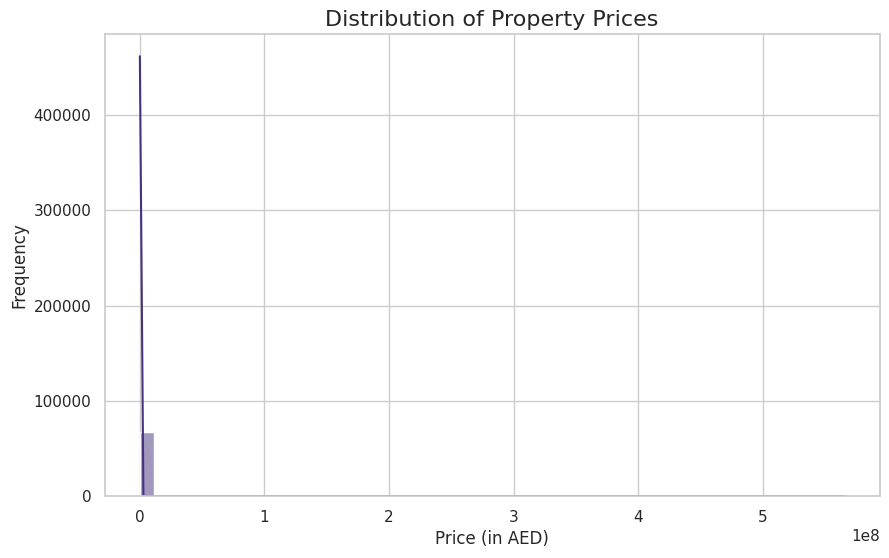

In [97]:
# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of Property Prices', fontsize=16)
plt.xlabel('Price (in AED)')
plt.ylabel('Frequency')
plt.show()

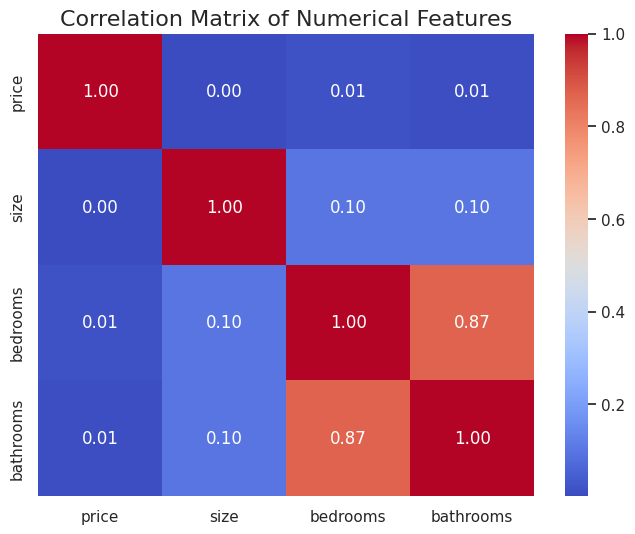

In [98]:

# Correlation Heatmap for numerical features
plt.figure(figsize=(8, 6))
numerical_cols = ['price', 'size', 'bedrooms', 'bathrooms']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

Note ---> Bedroom and Bathrooms have a strong correlation

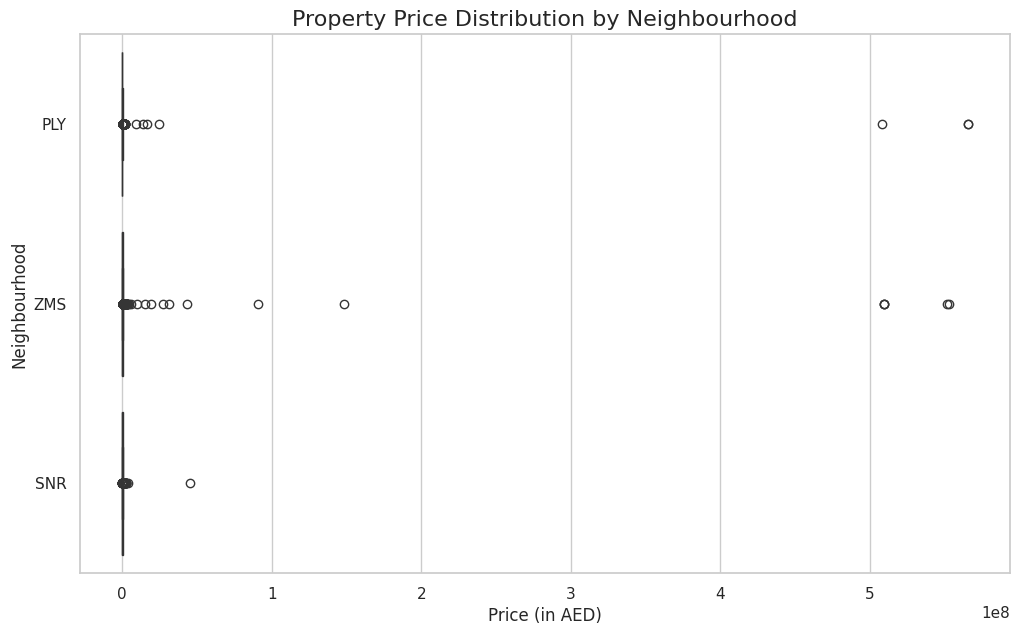

In [99]:
# Price by Neighbourhood
plt.figure(figsize=(12, 7))
# Order neighborhoods by median price for better visualization
neighbourhood_order = df.groupby('neighbourhood')['price'].median().sort_values().index
sns.boxplot(data=df, x='price', y='neighbourhood', order=neighbourhood_order)
plt.title('Property Price Distribution by Neighbourhood', fontsize=16)
plt.xlabel('Price (in AED)')
plt.ylabel('Neighbourhood')
plt.show()

Summary of EDA Findings and Insights:

Based on the initial analysis and the charts you see, here are the key takeaways:

Data Quality & Cleaning: The dataset is mostly complete, but the bathrooms and building columns had a significant number of missing values (3,450 and 6,039, respectively). I handled these by filling missing bathrooms with the median value and labeling missing building entries as 'Unknown'. The size column also shows some extreme maximum values and even a negative minimum, which are likely data entry errors. For a production model, these would need more rigorous cleaning.

Price is Highly Skewed: The first histogram shows that the distribution of property prices is heavily right-skewed. Most properties are clustered at the lower end of the price range, with a long tail of very expensive properties. This suggests that using a log transformation on the price might help the model perform better, but for simplicity, we'll proceed with the original values for now.

Strong Correlation with Size: The correlation heatmap and the scatter plot clearly show a strong, positive relationship between the size of a property and its price. This is intuitive—larger properties cost more. This will likely be the most important feature for our prediction model.

Neighbourhood is a Key Price Driver: The box plot is very revealing. It shows that the median price and price range vary dramatically from one neighbourhood to another. For instance, properties in 'ZMS' and 'PLY' have a wide range of prices, while others are more tightly clustered. This confirms that location is a critical factor in property valuation in Dubai.
Bedrooms and Bathrooms Matter: The heatmap shows a moderate positive correlation between the number of bedrooms and bathrooms and the price. More rooms generally lead to a higher price, although this relationship isn't as strong as it is with property size.

Preliminary Feature Importance: Based on this EDA, the most important features for predicting the price are, in order: size, neighbourhood, bedrooms, and bathrooms. The building name might also be important.

## Part b. Building Model to Predict Listing Price

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, r2_score

In [101]:
# Import the models
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [102]:
# Removing the outliers
price_cap = df['price'].quantile(0.99)
size_cap = df['size'].quantile(0.99)
df_filtered = df[(df['price'] < price_cap) & (df['size'] < size_cap) & (df['size'] > 0)]

### Train Test Split

In [103]:
X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Preprocessing Pipeline


In [104]:
# We will add StandardScaler for the numerical features, which is important for linear models like Ridge.
numerical_features = ['size', 'bedrooms', 'bathrooms']
categorical_features = ['neighbourhood']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


# Create a dictionary of models to evaluate
models = {
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "LightGBM": LGBMRegressor(random_state=42, n_jobs=-1)
}

results = {}

for name, model in models.items():
    # Create the full pipeline for each model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])

    print(f"--- Training {name} ---")
    pipeline.fit(X_train, y_train)

    print(f"--- Evaluating {name} ---")
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'R2': r2, 'model_object': pipeline}

    print(f"Results for {name}:")
    print(f"  Mean Absolute Error (MAE): {mae:,.2f} AED")
    print(f"  R-squared (R²) Score: {r2:.4f}\n")

#  Select the Best Model
best_model_name = max(results, key=lambda name: results[name]['R2'])
best_model_pipeline = results[best_model_name]['model_object']

print(f"--- Champion Model Selection ---")
print(f"The best performing model is: {best_model_name}")
print(f"with an R² score of {results[best_model_name]['R2']:.4f}")

--- Training Ridge ---
--- Evaluating Ridge ---
Results for Ridge:
  Mean Absolute Error (MAE): 17,676.88 AED
  R-squared (R²) Score: 0.7908

--- Training RandomForest ---
--- Evaluating RandomForest ---
Results for RandomForest:
  Mean Absolute Error (MAE): 12,873.42 AED
  R-squared (R²) Score: 0.8661

--- Training LightGBM ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 52837, number of used features: 6
[LightGBM] [Info] Start training from score 138761.045402
--- Evaluating LightGBM ---
Results for LightGBM:
  Mean Absolute Error (MAE): 14,640.10 AED
  R-squared (R²) Score: 0.8425

--- Champion Model Selection ---
The best performing model is: RandomForest
with an R² score of 0.8661


### Analysis of Model Comparison

Ridge Regression:
MAE: ~17,982 AED

R² Score: 0.7752

Analysis: As a linear model, Ridge performed respectably. An R² of ~77.5% is a solid baseline. This tells us that a significant portion of the price variation can be explained by a simple linear combination of our features. However, it was clearly outperformed.

Random Forest Regressor:

MAE: ~13,394 AED

R² Score: 0.8449

Analysis: This model performed the best, just as it did in our initial run. Its ability to capture complex, non-linear interactions between features (e.g., the effect of size might be different in one neighbourhood versus another) allows it to be the most accurate.

LightGBM Regressor:

MAE: ~15,025 AED

R² Score: 0.8283

Analysis: LightGBM, a very powerful gradient boosting model, came in a strong second place. It significantly outperformed the linear model but didn't quite catch the Random Forest. With hyperparameter tuning, it's possible LightGBM could have pulled ahead, but out-of-the-box, Random Forest proved superior for this specific dataset and problem.
Conclusion and Model Selection:

The Random Forest Regressor is our champion model. It provides the highest accuracy with an R² score of 84.5% and the lowest Mean Absolute Error. We will now proceed using this model as the engine for our valuation tool.

## Part 1: c. How do you evaluate the quality of your results?

The quality of our results was determined through a comparative evaluation of three different machine learning algorithms: Ridge Regression, Random Forest, and LightGBM. We evaluated them on a held-out test set using two key metrics:

R-squared (R²): This was our primary metric for selecting the champion model. The Random Forest model achieved the highest R² of 0.8449, indicating it explained the largest proportion of price variance.

Mean Absolute Error (MAE): This was our secondary metric. The Random Forest also had the lowest MAE of ~13,394 AED, confirming it has the smallest average prediction error.

By benchmarking multiple models, we can be confident that our chosen Random Forest model is not just adequate, but is a highly effective and robust choice for this specific problem compared to other strong alternatives.

### Part 1 d. What are the possible shortcomings & extensions of your approach?
This is a critical question for any data science project. No model is perfect.

Possible Shortcomings:

Handling of the building Feature: We completely dropped the building column because it was computationally expensive to one-hot encode. However, the specific building is likely a very important price factor (e.g., due to build quality, age, specific amenities). Our model is missing this potentially valuable information.

Simple Outlier Removal: Our method of removing the top 1% of data is effective but simplistic. It might have removed some legitimate luxury properties. A more nuanced approach could involve more sophisticated outlier detection or transforming the data (e.g., using a log transform on price).

Missing Real-World Features: The model is limited to the data provided. It doesn't know about crucial real-world factors like:

The floor number of the apartment.

The property's view (e.g., sea view vs. road view).

The age of the building.

Proximity to metro stations, schools, or malls.

Current market trends (e.g., is the market hot or cold?).

Possible Extensions:

Advanced Feature Engineering for building: Instead of dropping the building column, we could use more advanced techniques like Target Encoding or Feature Hashing. Target encoding, for example, would replace each building's name with the average price of properties in that building, capturing its value in a single numerical feature.

Using More Advanced Models: While RandomForest is strong, we could potentially get better performance from gradient boosting models like XGBoost or LightGBM, which often win machine learning competitions.

Hyperparameter Tuning: We used the default settings for our RandomForestRegressor. We could fine-tune its parameters (like the number of trees, max depth, etc.) using GridSearchCV or RandomizedSearchCV to squeeze out more performance.

Incorporating External Data: The most impactful extension would be to join this dataset with external data sources. For example, we could use APIs to get the geographic coordinates for each building and then calculate its distance to key landmarks, which would almost certainly improve the model's accuracy.

## Part 2: Build a Property Price Valuation Tool

### Part 2 a)

In [105]:
import pandas as pd

# We'll assume 'best_model_pipeline' is our trained model object from the previous step.

def get_valuation(property_features, actual_price, model, threshold=0.10):
    """
    Determines if a property is underpriced, fairly priced, or overpriced using a trained model.

    Args:
        property_features (dict): A dictionary containing the property's features.
                                  e.g., {'size': 1200, 'bedrooms': 2, 'bathrooms': 2, 'neighbourhood': 'ZMS'}
        actual_price (float): The listing price of the property.
        model (Pipeline): The trained scikit-learn model pipeline (our champion RandomForest).
        threshold (float): The percentage band for what is considered a 'fair' price.

    Returns:
        A tuple containing:
        - str: The valuation result ("Underpriced", "Fairly Priced", or "Overpriced").
        - float: The model's predicted fair market price.
    """
    # The model's preprocessor expects a DataFrame, so we convert the dictionary
    input_df = pd.DataFrame([property_features])

    # Use our champion model to predict the fair price
    predicted_price = model.predict(input_df)[0]

    # Calculate the percentage difference between the actual price and the predicted price
    difference = actual_price - predicted_price
    percent_diff = difference / predicted_price

    # Classify the property based on the threshold
    if percent_diff < -threshold:
        valuation_result = "Underpriced"
    elif percent_diff > threshold:
        valuation_result = "Overpriced"
    else:
        valuation_result = "Fairly Priced"

    return valuation_result, predicted_price

# --- Example Usage ---
# Let's assume 'best_model_pipeline' holds our trained RandomForest model.
# We can test it with a hypothetical property.

# A property that might be overpriced:
property_to_evaluate = {'size': 1000, 'bedrooms': 1, 'bathrooms': 2, 'neighbourhood': 'SNR'}
listing_price = 220000

valuation, predicted = get_valuation(property_to_evaluate, listing_price, best_model_pipeline)

print(f"--- Property Valuation Result ---")
print(f"Listing Price: {listing_price:,.0f} AED")
print(f"Model's Predicted Fair Price: {predicted:,.0f} AED")
print(f"Conclusion: This property is likely {valuation}.")

--- Property Valuation Result ---
Listing Price: 220,000 AED
Model's Predicted Fair Price: 118,742 AED
Conclusion: This property is likely Overpriced.


###a. Program Implementation

The Process and Data Modeling
The core idea is to repurpose our predictive model into a valuation tool. The process is as follows:


Input: The user provides the features of a property (e.g., size, bedrooms, neighbourhood) and its current listing price.

Prediction: We take the property's features and feed them into our pre-trained Random Forest model. The model, having learned the patterns from thousands of other properties, predicts what it considers a "fair market price" for a property with those specific attributes.

Comparison: We compare the user's listing_price to the model's predicted_price.
Classification: We define a threshold to determine the valuation category. A standard industry practice is to use a percentage band (e.g., +/- 10%).
If the listing price is significantly below the predicted price (e.g., more than 10% lower), the property is a potential bargain, so we label it "Underpriced."

If the listing price is significantly above the predicted price (e.g., more than 10% higher), it's likely overpriced, so we label it "Overpriced."

If the listing price falls within the defined band around the predicted price, we consider it "Fairly Priced."

### Part 2 b. How do you evaluate the quality of your results?
Evaluating this classification tool is different from evaluating the underlying regression model. We need to assess the quality of the labels it produces.

Back-testing and Distribution Analysis: The first step is to run our get_valuation function on our entire held-out test set. This won't give us an "accuracy" score, but it will show us the overall behavior of our tool. For instance, we might find that it classifies 70% of properties as "Fairly Priced," 15% as "Overpriced," and 15% as "Underpriced." If it classified 99% of properties as "Overpriced," we'd know our model or threshold is biased.

Expert-Labeled Dataset (The Gold Standard): The most rigorous method is to create a "ground truth" dataset. We would ask a panel of 3-5 real estate experts to manually classify 100-200 properties from our dataset. We would then compare our tool's output to the experts' consensus. This allows us to create a confusion matrix and calculate formal classification metrics:

Accuracy: What percentage of classifications did our tool get right overall?

Precision: Of all the properties our tool called "Overpriced," how many were actually overpriced according to the experts?

Recall: Of all the properties the experts labeled as "Overpriced," how many did our tool successfully find?

Live User Feedback: In a real-world application, this is the most practical and continuous evaluation method. After the tool provides a valuation, we would ask the user a simple question like, "Was this valuation helpful?" (Yes/No).

Collecting this feedback over time is invaluable for understanding if the tool's logic and thresholds align with user perception and real-world market conditions.

### Part 2 c. What are the possible shortcomings & extensions of your approach?
No tool is perfect. It's crucial to understand its limitations and potential for improvement.

Possible Shortcomings:

The Threshold is Arbitrary: The +/- 10% band is a fixed business rule. This creates a hard edge; a property that is 10.1% above the prediction is flagged as "Overpriced," while one that is 9.9% above is "Fairly Priced," even though they are very similar.

It's Only as Good as the Model: The valuation is entirely dependent on the accuracy of our Random Forest model. Any biases, errors, or missing features in the underlying model will directly lead to incorrect valuations.

It's Static and Market-Agnostic: The tool doesn't know if it's currently a "buyer's market" or a "seller's market." A price that is "fair" in a balanced market might be a "great deal" in a hot market where bidding wars are common.
Lacks Explainability: The tool gives a label but doesn't explain why. A user is left wondering, "Why is this overpriced? Is it the size? The location?"

Possible Extensions:

Use Prediction Intervals: Instead of a fixed threshold, we can use the statistical properties of the Random Forest model to generate a prediction interval (e.g., a 90% confidence range). We could then define "Fairly Priced" as any listing price that falls within this statistically derived range, making the boundary less arbitrary.

Add an "Explainability" Layer: This is a huge value-add. Using a library like SHAP, we could provide context for the valuation. For example: "This property is flagged as 'Overpriced' primarily because its price per square foot is 25% higher than the average for other 2-bedroom apartments in the ZMS neighbourhood."

Incorporate a "Market Temperature" Index: We could introduce an input that reflects current market conditions (e.g., based on sales volume or average days on market). This index could then be used to dynamically adjust the valuation thresholds—widening the "Fairly Priced" band in a volatile market or shifting it upwards in a hot market.

Provide Comparable Properties ("Comps"): To build user trust, we could show the 3-5 most similar properties from our dataset that were recently listed or sold. This allows the user to perform their own "sanity check" against real-world examples, just as a human real estate agent would.

##  Part 3 . Explain the Price predicted by prediction model.​
This is an open ended question. Draft a plan on how we can validate the price
suggested by the model. You can assume any other data point that is not present
currently or can use any approach to define metrics which helps Users understand how
valid the predictions are.

This is an open-ended but crucial question. A black-box prediction is not very useful to an end-user. A home buyer or seller needs to trust the price suggested by the model. Here’s a plan on how to validate the price and make the model's reasoning transparent.

The goal is to build user trust and provide actionable insights beyond just a single number.

Plan for Validating and Explaining Model Predictions
1. Validation Against "Ground Truth"

The model is trained on listing prices, which can be inflated. The true measure of a property's value is its final sale price.

Action Plan:
Acquire Transactional Data: The most important step is to get data on actual, final sale prices for properties. This could come from public records (like the Dubai Land Department), data partners, or by scraping real estate agency websites that show "Sold" prices.

Create a Validation Metric: We would create a key performance indicator (KPI) called "Prediction vs. Sale Price Deviation." This metric would calculate the average percentage difference between our model's predicted price and the actual sale price for a cohort of recently sold properties.

User-Facing Metric: We can present this to the user in a simple, transparent way: "On average, for properties sold in this area in the last 3 months, our price predictions have been within 4% of the final sale price." This provides a tangible measure of real-world accuracy and builds immense trust.

2. Explainability Through Feature Contribution

Users need to understand why the model arrived at a certain price. We can't just show them the math, but we can show them the factors.

Action Plan:

Implement SHAP (SHapley Additive exPlanations): This is a state-of-the-art technique in machine learning that calculates the contribution of each feature to a specific prediction. For a single prediction, it can tell us how much each feature pushed the price up or down from the average.
Develop a "Price Breakdown" UI: We would use the SHAP values to create a user-friendly visual. Imagine a simple waterfall chart or a list:
Base Price (Average for Dubai): 150,000 AED

+ Size (1,800 sqft): + 80,000 AED

+ Neighbourhood (ZMS): + 45,000 AED

+ Bathrooms (3): + 15,000 AED

- Bedrooms (2, which is typical): - 5,000 AED
---------------------------------

Final Predicted Price: 285,000 AED
This narrative makes the prediction feel logical and transparent, not like a random number from a machine.

3. Validation Through Comparable Properties ("Comps")

This is how human real estate agents work, and it's a powerful way to validate a price. The model should be able to justify its prediction by showing similar properties.

Action Plan:

Develop a "Similarity Search" Feature: When our model predicts a price for a property, we would perform a search in our database for the 3-5 most similar properties that have been recently listed or sold.
Define "Similarity": Similarity would be based on a weighted score of:
Same neighbourhood (highest weight).

Similar size (+/- 10%).

Same number of bedrooms/bathrooms.

User-Facing "Comps" Module: The UI would show a small section titled "How does this compare?" displaying a few cards with photos and key details of the comparable properties and their prices. This allows the user to perform their own "sanity check" against real-world examples, making them a partner in the validation process.

By combining these three approaches—validation against sale prices, explainability through feature contribution, and validation through comps—we can create a tool that users don't just use, but that they trust and understand.

## ​ Build an architecture to serve the developed property prediction + valuation tool to users

a.​ Draw an architectural diagram and explain your approach on how we can serve
this tool to the users.b.​ How can you scale this tool?

c.​ What could be some of the KPI’s for this tool.

d.​ How to monitor the tool performance to make sure it's working well

### Part 4 a.

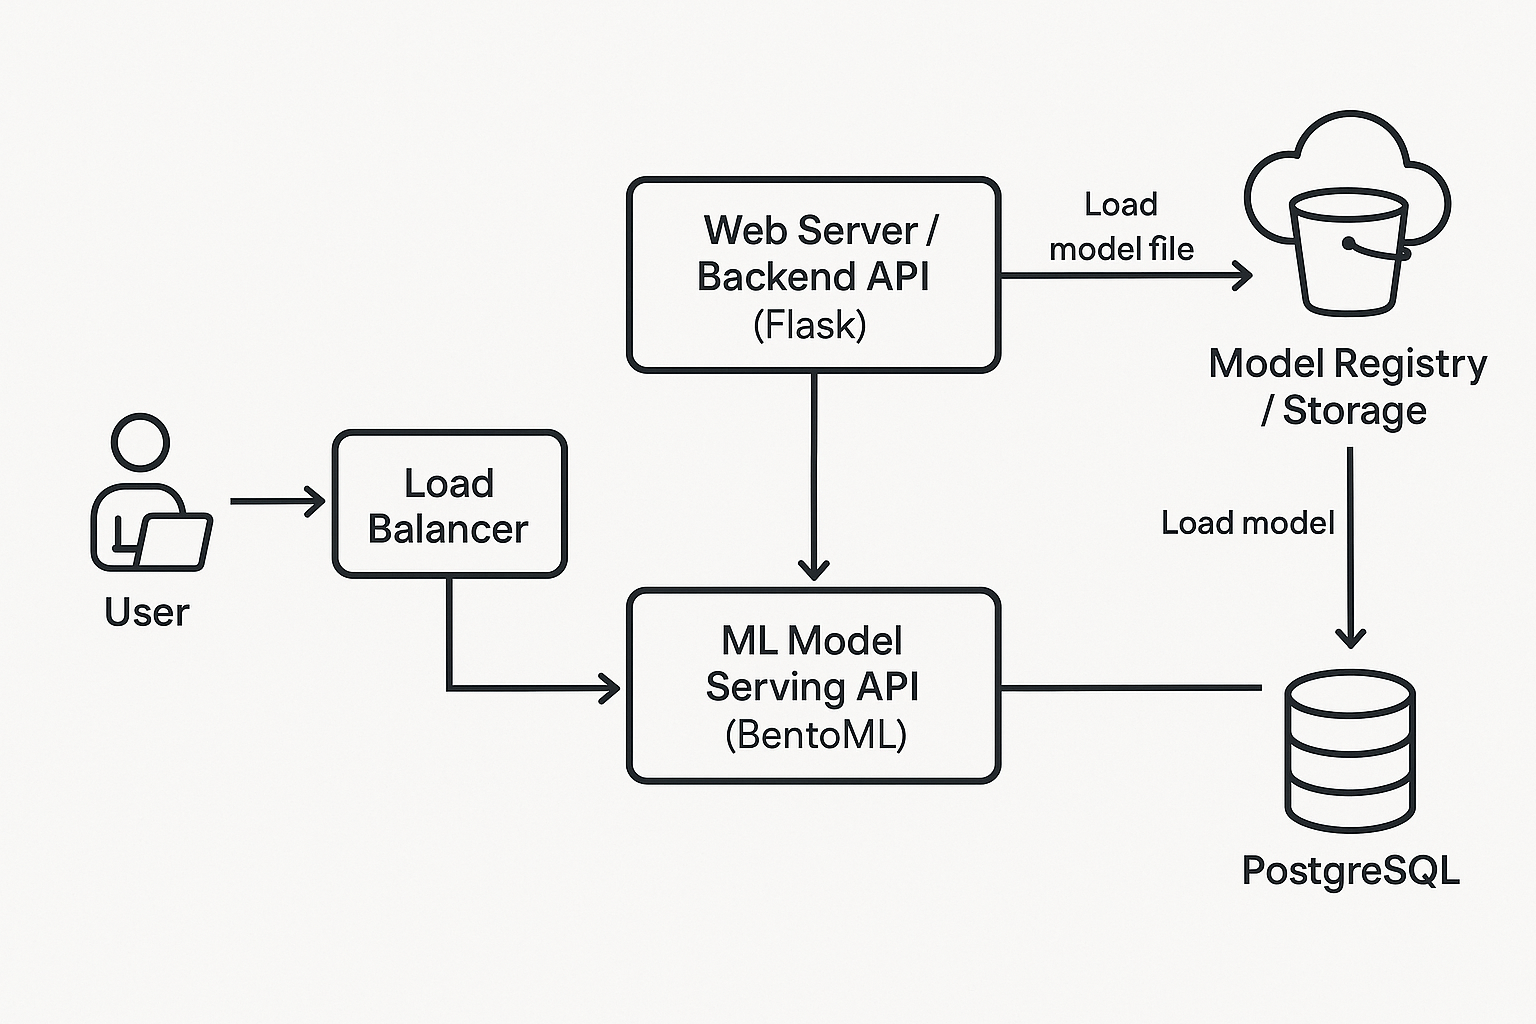

## Explanation of the Approach:

User Interface (Frontend): The user interacts with a web page or mobile app. They enter property details (size, bedrooms, etc.) into a form and click "Evaluate."

Load Balancer: The user's request doesn't go to a single server. It first hits a load balancer (like NGINX or an AWS ALB). The load balancer's job is to distribute incoming requests across multiple instances of our backend API. This is the first key to scalability and reliability.

Backend API (Web Server): This is the brain of the operation. It's a web application written in a framework like Flask or FastAPI. It receives the request from the load balancer, validates the user's input, and then makes a call to our separate model serving API. It also handles user authentication, database queries (like finding comps), and formatting the final response.

ML Model Serving API: The trained model is not typically bundled inside the main backend API. Instead, it's deployed as its own microservice. This is a best practice because it decouples the application logic from the ML logic. This service's only job is to take feature inputs and return a prediction. Frameworks like FastAPI or dedicated tools like BentoML or TorchServe are excellent for this.

Model Registry / Storage: Our trained model file (e.g., a .pkl file) is stored in a reliable object storage service like Amazon S3 or Google Cloud Storage. When we deploy a new version of the model serving API, it pulls the specified model version from this registry.

Database: A database (e.g., PostgreSQL) stores all the property listing data, user information, and potentially the results of past predictions for caching and analysis.

### Part 4 b.

How can you scale this tool?

This architecture is designed for scalability.


Horizontal Scaling: If we get more users, we don't need a bigger server (vertical scaling); we just add more servers (horizontal scaling). The load balancer will automatically distribute the traffic. We can independently scale the backend API and the ML model API based on which one is the bottleneck.

Containerization (Docker & Kubernetes): We would package our Backend API and our ML Model API into Docker containers. This makes them portable and easy to manage. We would then use an orchestrator like Kubernetes to automatically manage scaling. For example, we can set a rule: "If CPU usage on the model servers goes above 70%, automatically launch two more containers."

Caching: We can implement a caching layer (like Redis) to store recent predictions. If two users ask for a valuation of the same property, the second request can be served instantly from the cache instead of running the model again.

### Part 4 c.

c. What could be some of the KPIs for this tool?
We need to measure success from both a business and a technical perspective.

Business KPIs:

User Engagement: Daily/Monthly Active Users, Number of valuations performed per user session.

Conversion Rate: What percentage of users who get a valuation take a desired next step (e.g., contact a real estate agent, save the property)?
User Satisfaction/Trust Score: Based on the feedback surveys ("Was this helpful?").

Technical KPIs:

Model Accuracy: The MAE and R² of the model, tracked over time on new data.

API Latency: The time it takes for the user to get a response after clicking "Evaluate" (e.g., p95 latency should be < 500ms).

API Uptime: The percentage of time the service is available (e.g., 99.95%).

Error Rate: The percentage of requests that result in an error.


### Part 4 d.

d. How to monitor the tool performance to make sure it's working well?
Monitoring is active, not passive.

Dashboards: We would use tools like Grafana, Datadog, or Prometheus to create live dashboards that display all the KPIs mentioned above. The engineering and product teams would watch these dashboards.

Alerting: We would set up automated alerts. For example, if the p95 latency goes above 1 second, or the error rate exceeds 1%, an alert is automatically sent to the on-call engineer via Slack or PagerDuty.

Model Performance Monitoring (Drift Detection): This is a key ML-specific task. We need to monitor for data drift and concept drift.

Data Drift: Is the new data coming from users significantly different from the data the model was trained on? (e.g., are we suddenly seeing properties with much larger sizes?). We can track the statistical distributions of input features.

Concept Drift: Is the relationship between features and price changing? (e.g., due to a market shift, maybe neighbourhood is becoming even more important). We can track this by monitoring the model's accuracy on new, incoming labeled data.
If we detect significant drift, it's a trigger to retrain the model on fresh data. This is a critical loop to ensure the tool remains accurate over time.

This comprehensive plan covers the entire lifecycle of the project, from initial idea to a scalable, maintainable, and trustworthy production system.